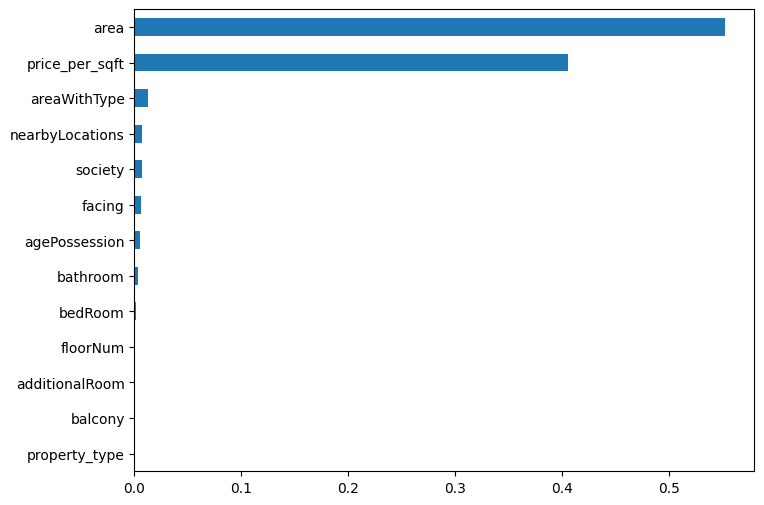

Colunas com baixa importância que estão presentes: ['property_type', 'society', 'bedRoom', 'bathroom', 'balcony', 'additionalRoom', 'floorNum', 'facing', 'agePossession', 'nearbyLocations']
   price  price_per_sqft    area  areaWithType
0   5.25         20115.0  2610.0           115
2   2.10         38251.0   549.0           197
3   5.00         43066.0  1161.0            26
4   3.00         53763.0   558.0           199
5   4.50         39062.0  1152.0            25


In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Carregar o dataset e remover valores nulos
df = pd.read_csv('../house_cleaned.csv').dropna()

# ===================== Remover as colunas de texto irrelevantes ====================
df = df.drop(['address', 'description', 'furnishDetails', 'features', 'rating', 'property_name'], axis=1)

# ===================== Transformar as variáveis categóricas em valores numéricos ====================
# Listar colunas categóricas (do tipo 'object')
categorical_columns = df.select_dtypes(include=['object']).columns

# Criar o LabelEncoder
lb = LabelEncoder()

# Transformar todas as colunas categóricas
for col in categorical_columns:
    df[col] = lb.fit_transform(df[col])

# ===================== Modelo de Árvore de Decisão e importância das colunas ======================
X = df.drop(columns=["price"])  # Coluna alvo "price"
y = df["price"]

# Treinando o modelo de árvore de decisão
modelo = DecisionTreeRegressor().fit(X, y)

# Pegando a importância das colunas
importances = pd.Series(modelo.feature_importances_, index=X.columns)

# Exibindo o gráfico de importância das colunas
importances.sort_values().plot(kind="barh", figsize=(8, 6))
plt.show()

# ===================== Identificando as colunas de baixa importância ======================
# Definir um limite de importância (por exemplo, 0.01)
limite = 0.01
colunas_baixa_importancia = importances[importances < limite].index.tolist()

# print(f"Colunas com baixa importância (menor que {limite}): {colunas_baixa_importancia}")

colunas_baixa_importancia_presentes = [col for col in colunas_baixa_importancia if col in df.columns]
print("Colunas com baixa importância que estão presentes:", colunas_baixa_importancia_presentes)


# ===================== Remover colunas com baixa importância ======================
# Remover as colunas de baixa importância do dataframe
df_reduzido = df.drop(columns=colunas_baixa_importancia)

# Exibir as primeiras linhas do novo dataframe sem as colunas de baixa importância
print(df_reduzido.head())


In [26]:
# retirnado colunas e baixa importancia

df = df.drop(columns=colunas_baixa_importancia_presentes, errors='ignore')


X = df.drop(['price'], axis = 1)
Y = df['price']

In [ ]:
# ================= MODELOS DE EXEMPLO ====================

from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# ======== bagging mais dtr

# Modelo base (árvore de decisão)
modelo_bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)

# Treinar
modelo_bagging.fit(X_train, y_train)

# Prever
y_pred = modelo_bagging.predict(X_test)

# Avaliação
mse = mean_squared_error(y_test, y_pred)
print(f'MSE do Bagging: {mse:.4f}')

# boasting + adabost dcr

from sklearn.ensemble import AdaBoostRegressor

# #======== AdaBoost com Decision Tree fraca

modelo_boosting = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42)

# Treinar
modelo_boosting.fit(X_train, y_train)

# Prever
y_pred = modelo_boosting.predict(X_test)

# Avaliação
mse = mean_squared_error(y_test, y_pred)
print(f'MSE do AdaBoost: {mse:.4f}')

# # ======== stacking regressor


from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Modelos base
base_models = [
    ('dt', DecisionTreeRegressor()), 
    ('svr', SVR())
]

# Modelo final (meta-modelo)
modelo_stacking = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Treinar
modelo_stacking.fit(X_train, y_train)

# Prever
y_pred = modelo_stacking.predict(X_test)

# Avaliação
mse = mean_squared_error(y_test, y_pred)
print(f'MSE do Stacking: {mse:.4f}')





KeyboardInterrupt: 